## Nevrita Natasya Putriana
## 23/514635/TK/56500
## Kelas B
__________________________________________________________________________________

##### Deklarasikan gambar dan environment-nya (numpy)

In [88]:
from PIL import Image
import numpy as np
import os

##### Input gambar dan deklarasikan sebagai foto_satu
##### Gambar yang awalnya berwarna diubah menjadi black and white dengan cara menambahkan .convert('L')

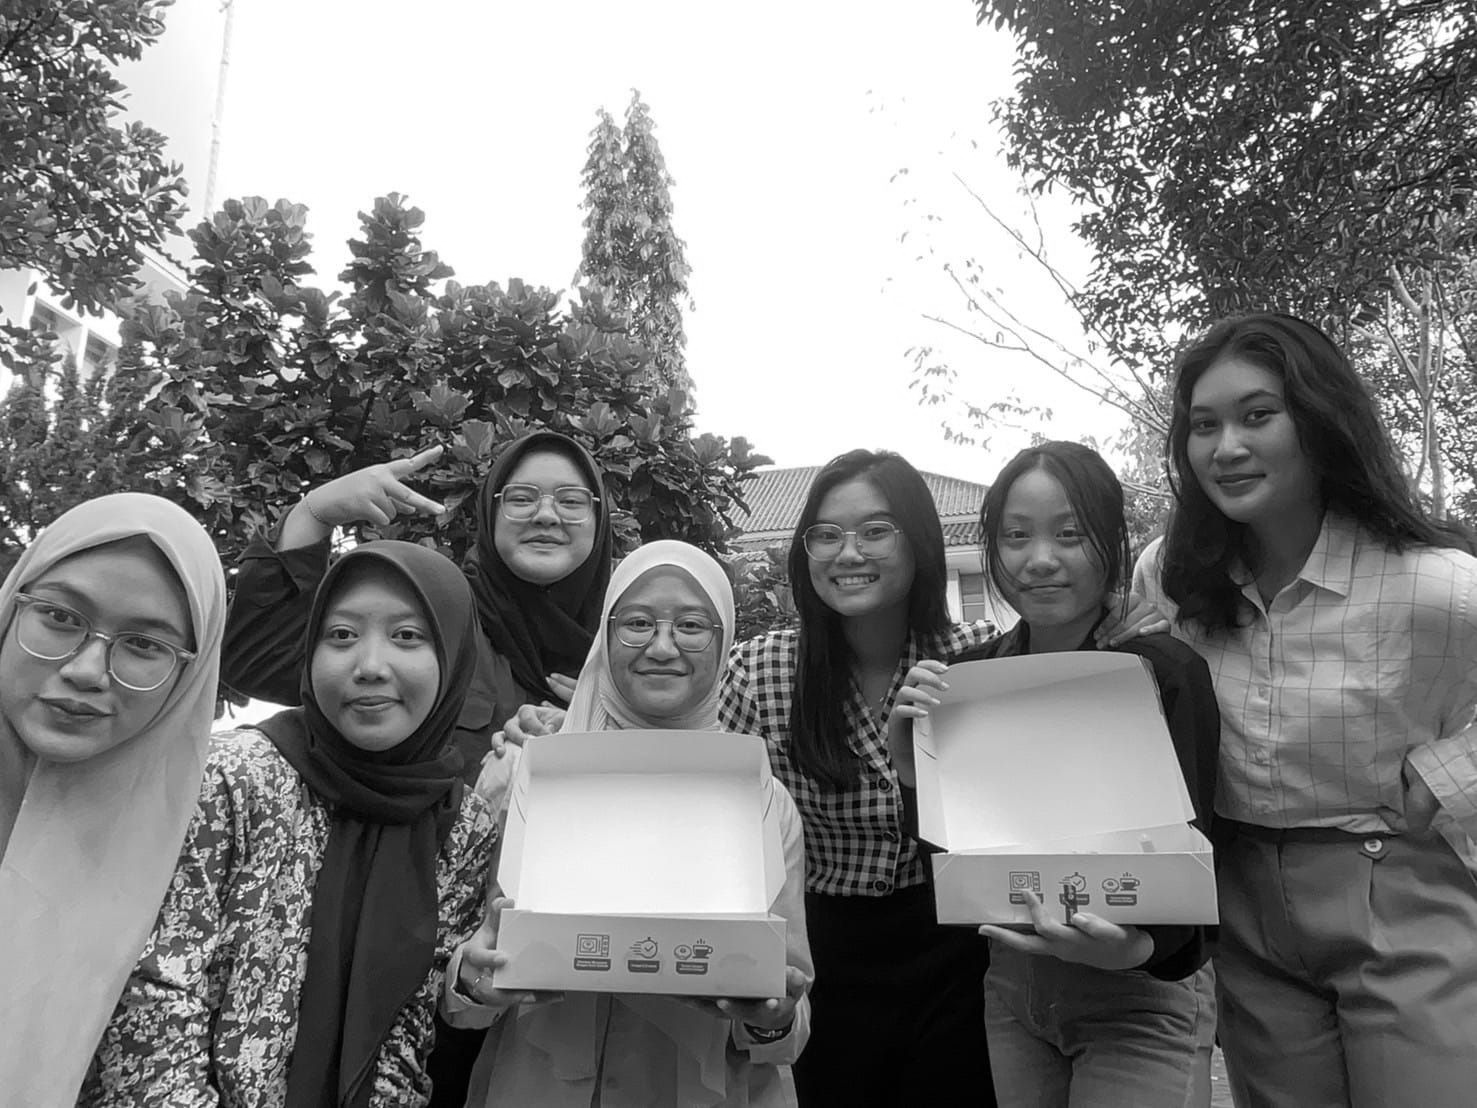

In [89]:
foto_satu = Image.open('picture.jpg').convert('L')
foto_satu 

##### Menentukan ukuran gambar dalam RGB dan Grayscale

In [90]:
print("RGB", os.path.getsize('picture.jpg'), "bytes")
foto_satu.save('picture_grey.jpg')
print("Grayscale", os.path.getsize('picture_grey.jpg'), "bytes")

RGB 264860 bytes
Grayscale 220958 bytes


##### Ubah Gambar ke Matriks

In [91]:
matriks_satu = np.array(foto_satu)
matriks_satu

array([[104,  95,  87, ..., 129, 151, 127],
       [ 99,  89,  80, ...,  84,  88,  65],
       [ 93,  83,  73, ...,  75,  73,  70],
       ...,
       [175, 174, 174, ..., 104, 105, 105],
       [175, 174, 174, ..., 103, 104, 104],
       [174, 174, 174, ..., 102, 103, 103]], dtype=uint8)

##### Menentukan U, Σ, dan V transpose

In [92]:
U, S, Vtrans = np.linalg.svd(matriks_satu, full_matrices=False)
print(U.shape, S.shape, Vtrans.shape)

(1108, 1108) (1108,) (1108, 1477)


##### Print Matriks Σ

In [93]:
print(S)

[1.79632065e+05 3.95857679e+04 3.44557942e+04 ... 2.86446054e+00
 2.84794154e+00 2.67013866e+00]


##### Meng-compress gambar awal dengan cara memotong matriks awal dengan mengalikannya oleh nilai k (k=100)

In [94]:
k = 100
U_k = U[:, :k]
S_k = S[:k]
Vtrans_k = Vtrans[:k, :]

print(U_k.shape, S_k.shape, Vtrans_k.shape)

#ubah S_k jadi matriks diagonal
S_k = np.diag(S_k)

matriks_dua = np.dot(np.dot(U_k, S_k), Vtrans_k)
matriks_dua

(1108, 100) (100,) (100, 1477)


array([[ 83.428567  ,  87.27467089,  81.22085643, ..., 109.97039574,
         99.29611304,  84.66693075],
       [ 84.32966798,  88.57956411,  85.03753343, ...,  89.19501252,
         78.68168109,  65.3953414 ],
       [ 79.30609168,  84.77360323,  86.11111911, ...,  84.6190806 ,
         75.65031085,  64.0976189 ],
       ...,
       [181.88849394, 181.6412245 , 177.09495656, ..., 100.18147112,
        113.55092995, 120.14602106],
       [175.53891751, 173.47278473, 168.20711087, ..., 104.05746236,
        121.33126095, 129.36651228],
       [163.2430841 , 160.5567513 , 157.30497602, ..., 108.87980335,
        126.60426831, 132.93524014]])

##### Menghapus nilai matriks yang tidak sesuai dan memastikan bahwa nilai berada di antara 0, 255
##### Lalu, ubah matriks tersebut ke dalam bentuk gambar

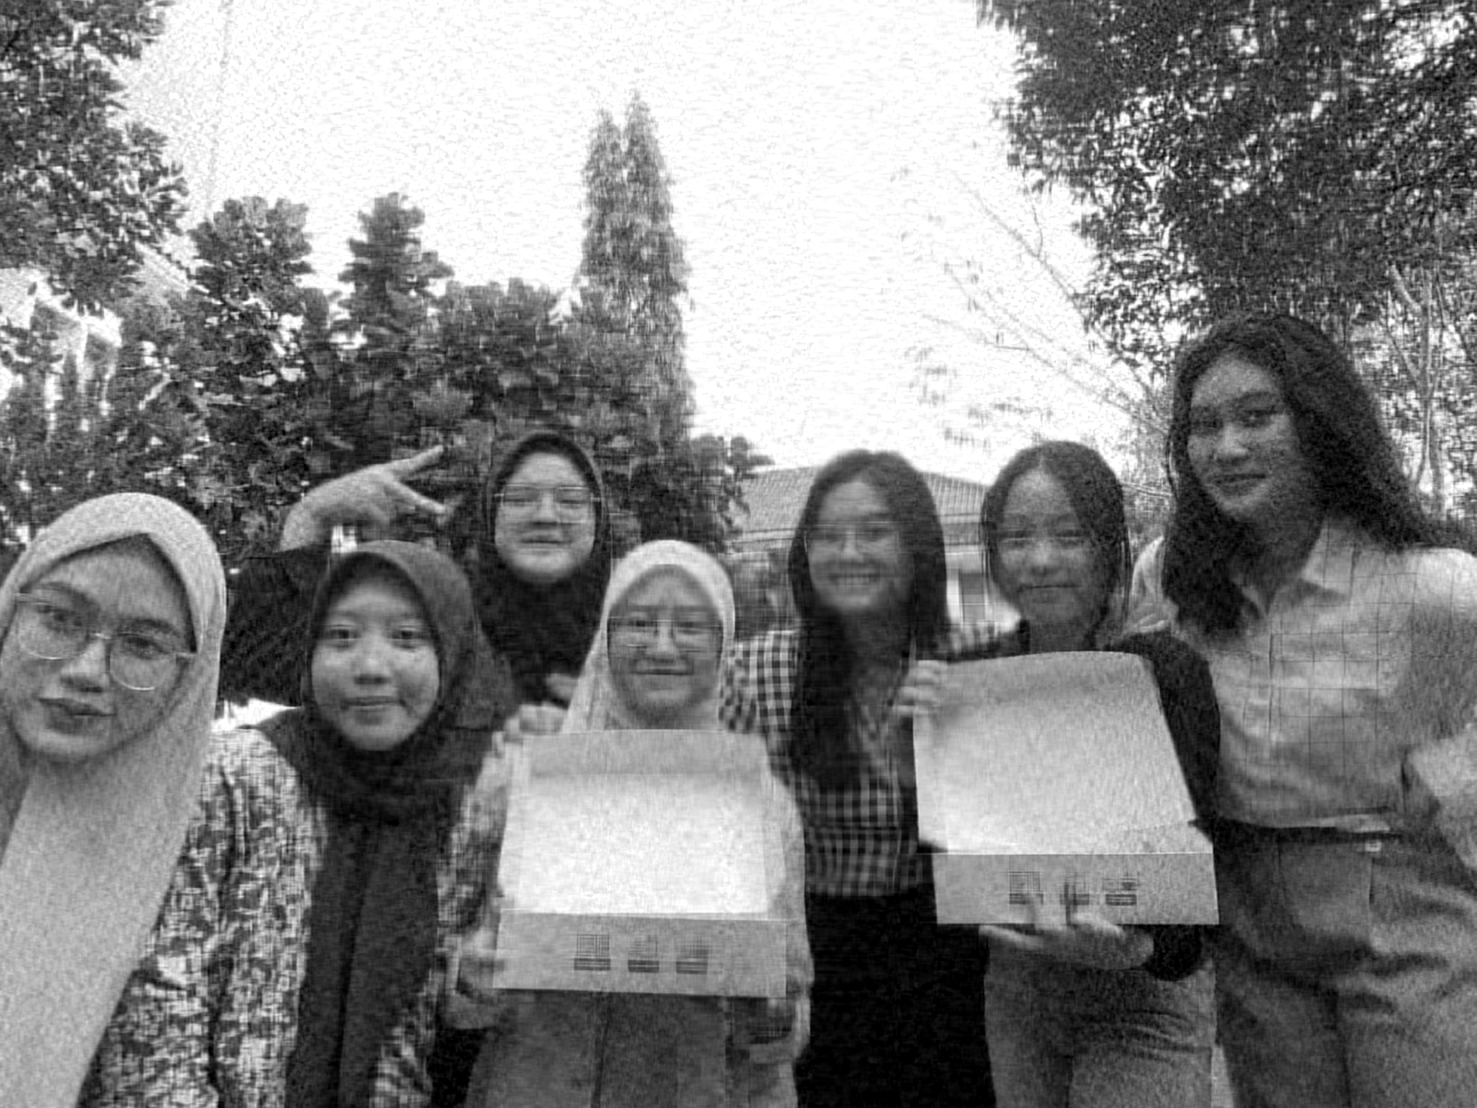

In [95]:
matriks_dua = np.clip(matriks_dua, 0, 255)

#ubah menjadi ke type uint8
matriks_dua = matriks_dua.astype(np.uint8)

gambar_dua = Image.fromarray(matriks_dua)
gambar_dua

##### Menampilkan ukuran gambar awal, gambar ketika grayscale, dan gambar setelah dicompressed

In [96]:
gambar_dua.save('compressed_picture.jpg')

print("Gambar Awal :", os.path.getsize('picture.jpg'), "bytes")
print('Greyscale :', os.path.getsize('picture_grey.jpg'), "bytes")
print('Compressed :', os.path.getsize('compressed_picture.jpg'), "bytes")

Gambar Awal : 264860 bytes
Greyscale : 220958 bytes
Compressed : 235042 bytes
